In [2]:
#EDA on Titanic Dataset - Goal is to observe how many people survived.
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading data
titanic_data = pd.read_csv('titanic_train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Starting with Exploratory Data Analysis
#check missing values
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

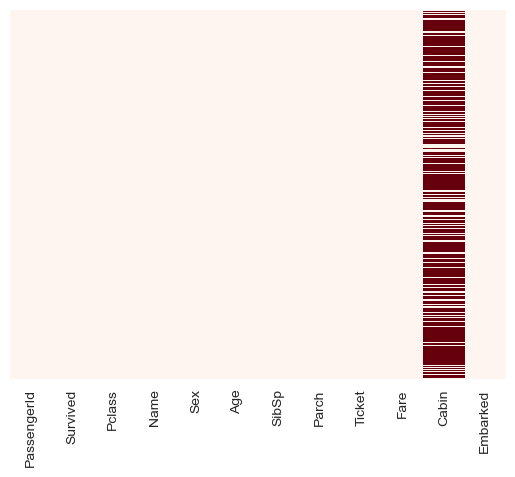

In [103]:
#Using Heatmap to check which columns data is missing
sns.heatmap(titanic_data.isnull(),yticklabels=False, cbar=False, cmap='Reds')
#cbar=False, to remove color bar 
#cmap/color map - to change color of heatmap
#data you can give with required conditions we want null values or requirement like if you want correlation

From above heatmap, we conclude, Age and Cabin colums have missing values.
Roughly 20% of values in Age column is missing. We can either drop this column if not required, or fill missing values depending
on some conditions.
We observe most of the values in Cabin column is missing almost 95%, so dropping it can be good idea, instead forward/backward filling it or filling it depending on some condition.

Text(0, 0.5, 'Number of People')

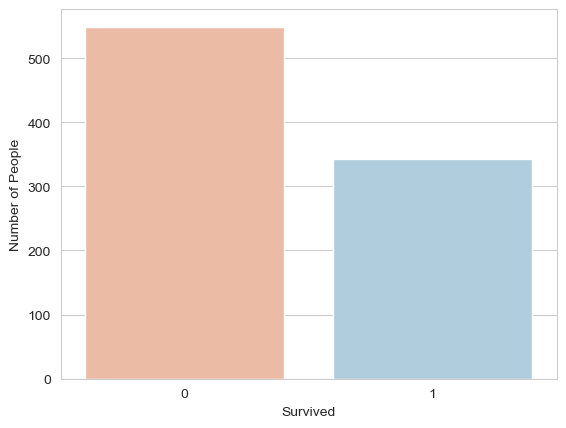

In [39]:
#Counting number of people survived
sns.set_style('whitegrid')
sns.countplot(data=titanic_data, x='Survived',palette='RdBu')
plt.xlabel('Survived')
plt.ylabel('Number of People')


Text(0, 0.5, 'Number of People')

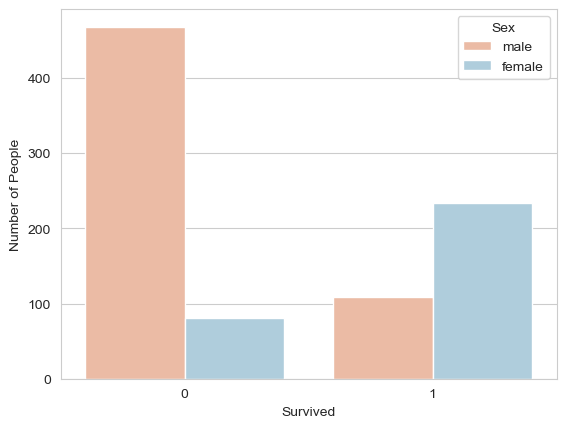

In [38]:
#Counting number of male and females survived or not
sns.countplot(data=titanic_data, x='Survived',hue='Sex',palette='RdBu')
plt.xlabel('Survived')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

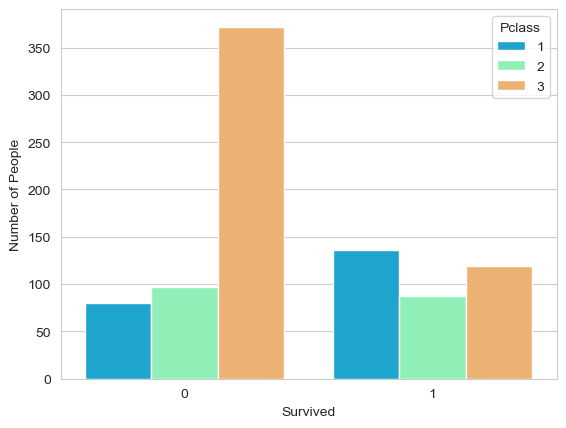

In [44]:
#Counting number of people survived based on passenger class
sns.set_style('whitegrid')
sns.countplot(data=titanic_data,x='Survived',hue='Pclass',palette='rainbow')
plt.xlabel('Survived')
plt.ylabel('Number of People')

<AxesSubplot:xlabel='Age', ylabel='Count'>

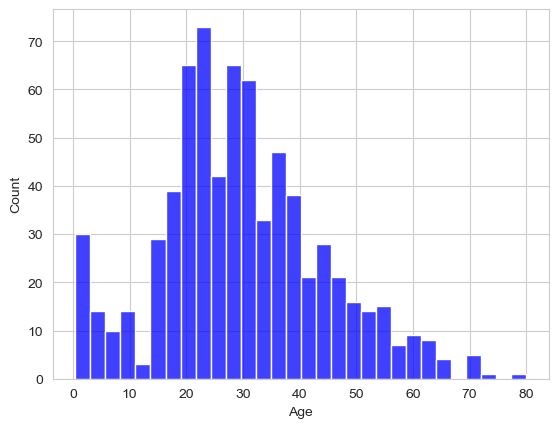

In [83]:
sns.histplot(titanic_data['Age'].dropna(),kde=False,color='blue',bins=30)
#sns.distplot(titanic_data['Age'].dropna(),kde=False,color='blue',bins=40)


<AxesSubplot:>

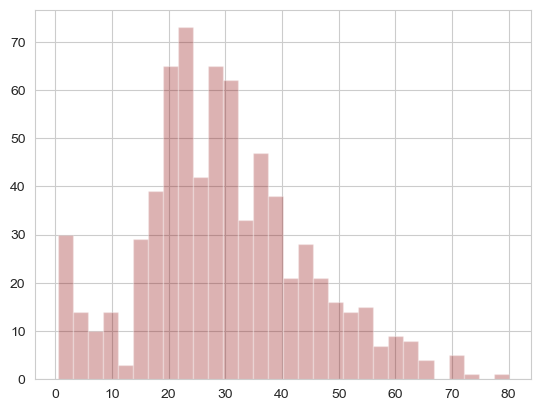

In [87]:
titanic_data['Age'].hist(bins=30,color='darkred',alpha=0.3)
#plt.hist(data=titanic_data,x='Age',bins=30,density=False,alpha=0.3)

Text(0, 0.5, 'Number of People')

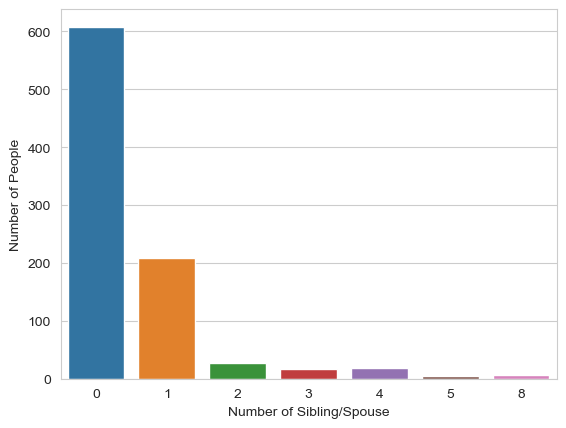

In [89]:
#Counting number of people having Sibling/Spouse
sns.countplot(data=titanic_data,x='SibSp')
plt.xlabel('Number of Sibling/Spouse')
plt.ylabel('Number of People')

<AxesSubplot:>

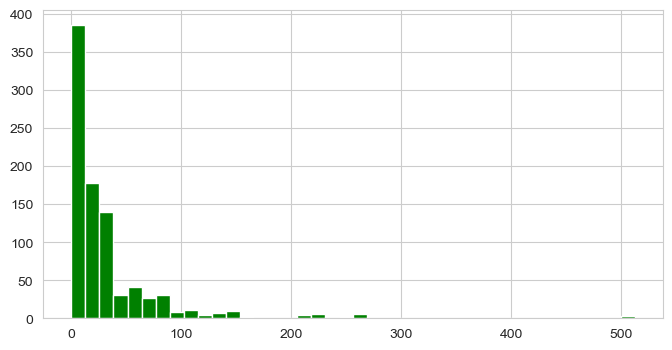

In [90]:
titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

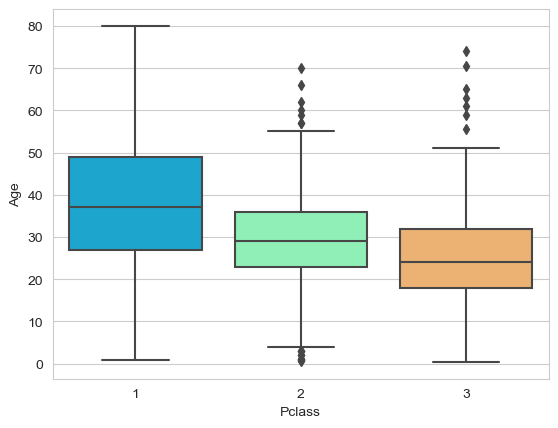

In [91]:
#Data Cleaning
#We will now fill missing age value in Age column, instead of dropping it, we will find mean age of every class and put those 
#values in missing cells.
#finding average age of people based on passenger class
sns.boxplot(data=titanic_data, x='Pclass', y='Age',palette='rainbow')
#Class 1 : avg age approx 37, Class 2 : 29, Class 3 : 24 approx
#We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
#We'll use these average age values to impute based on Pclass for Age.

In [92]:
#creating function
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass==1:
            return 37
        elif PClass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [96]:
#applying the function
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

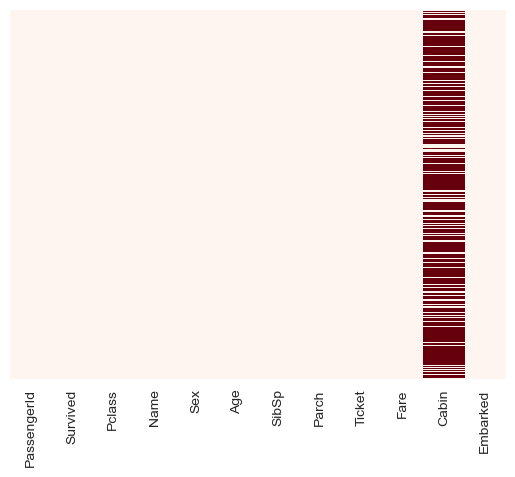

In [102]:
#checking heatmap again to confirm if function applied fills the null values with avg value
sns.heatmap(data=titanic_data.isnull(),cbar=False,yticklabels=False,cmap='Reds')

In [108]:
#dropping Cabin column since 98% values are missing and column be won't much useful for further analysis
titanic_data.drop('Cabin',axis=1,inplace=True)

In [109]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

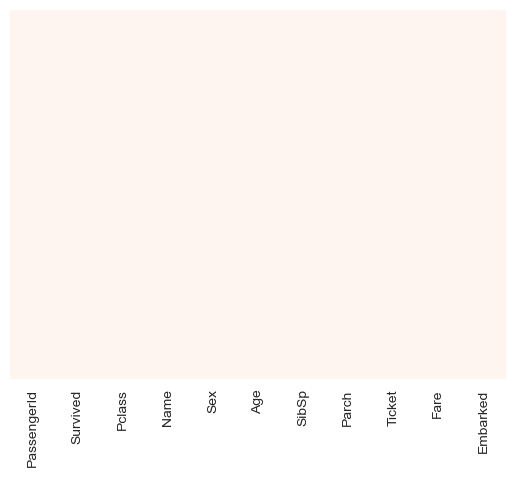

In [110]:
sns.heatmap(data=titanic_data.isnull(),cbar=False,yticklabels=False,cmap='Reds')